# Lab Solutions

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, recall_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
target = pd.read_csv('files_for_lab/target.csv')
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [3]:
numerical = pd.read_csv('files_for_lab/numerical.csv')
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [4]:
categorical = pd.read_csv('files_for_lab/categorical.csv')
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


**Apply the Random Forests algorithm but this time only by upscaling the data.**

In [5]:
target['TARGET_B'].value_counts(dropna=False)

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [6]:
encoder = OneHotEncoder(drop='first').fit(categorical)

categorical_np = encoder.transform(categorical).toarray()

categorical_encoded = pd.DataFrame(categorical_np, columns=encoder.get_feature_names_out())

In [7]:
#Concat num and cat
y = target['TARGET_B']
X = pd.concat([numerical, categorical_encoded], axis=1)
X.shape

(95412, 634)

In [8]:
#X-Y Split -> Decission Tree doesn't need scaling data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
#Resampling
sm = SMOTE(random_state=1)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [10]:
print(y_train_SMOTE.value_counts(dropna=False))
print(y_train_SMOTE.shape)

0    72464
1    72464
Name: TARGET_B, dtype: int64
(144928,)


In [11]:
#Perform model
clf = RandomForestClassifier(min_samples_split=2, min_samples_leaf =2, random_state = 1).fit(X_train_SMOTE, y_train_SMOTE)

y_train_pred = clf.predict(X_train_SMOTE)
y_test_pred = clf.predict(X_test)

In [12]:
#Measure performance
print("The score for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_SMOTE, y_train_SMOTE)))
print("The score for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

The R2 for the Random Forest in the TRAIN set is 1.00
The R2 for the Random Forest in the TEST  set is 0.95


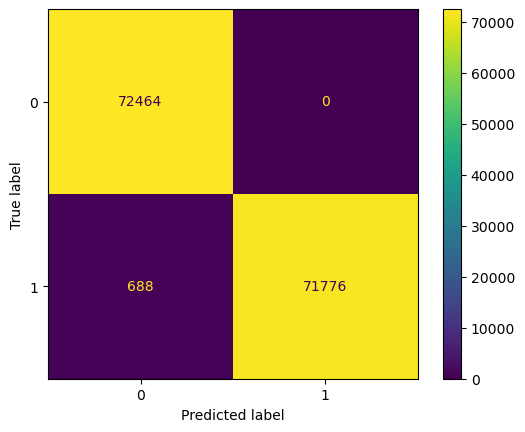

In [13]:
cm_train = confusion_matrix(y_train_SMOTE, y_train_pred)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=clf.classes_)
disp_train.plot()

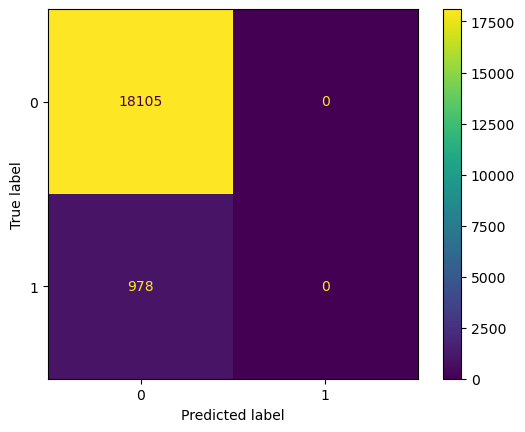

In [14]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_)
disp_test.plot()

**Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative?**

In [15]:
#Multiply the values of the confusion matrix by the mean of the colum
fp_cost_train = 0
fn_cost_train = 688 * (target[target['TARGET_B']==1]['TARGET_D'].mean()) #right-up

fp_cost_test = 0 #righy-up
fn_cost_test = 978 * (target[target['TARGET_B']==1]['TARGET_D'].mean()) #left-down

In [16]:
print('The cost of False Positives in the test set is: ', round(fn_cost_test,2))
print('The cost of False Positives in the train set is: ', round(fn_cost_train,2))

The cost of False Positives in the test set is:  15280.61
The cost of False Positives in the train set is:  10749.55


Probably the **highest cost** for the company is that the model precit too much **false negatives** because this means that we are detecting people which are willing to donate in real life and classify them as not likely to donate (we are losing potencial donations), while false positives mean that the model predict that a person is willing to donate when in fatc this is not true.

**Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Please checkout make_scorer alogside with GridSearchCV in order to train the model to maximize the error metrics of interest in this case.**

Because we are trying to minimize false negatives, a good metric to maximaze will be **recall** because the higher the value the lower false nagatives (which are located in the denominator) 

In [17]:
make_scorer(recall_score)

make_scorer(recall_score)

In [18]:
max_depth_choices= [3,10,None] 
criterion_choices = ["gini", "entropy"]
num_estimators = [50, 100, 150]
min_samples_split_choices = [2,10] 
min_samples_leaf_choices = [2,10]

In [19]:
grid = {'max_depth': max_depth_choices,
        'n_estimators': num_estimators,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [20]:
model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, verbose = 100, error_score="raise")

In [21]:
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 1/72] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.812 total time=   8.2s
[CV 2/5; 1/72] START criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 1/72] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.900 total time=   8.7s
[CV 3/5; 1/72] START criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 1/72] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.908 total time=   8.3s
[CV 4/5; 1/72] START criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 1/72] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estim

[CV 4/5; 7/72] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.925 total time=   9.3s
[CV 5/5; 7/72] START criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, n_estimators=50
[CV 5/5; 7/72] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, n_estimators=50;, score=0.906 total time=   8.9s
[CV 1/5; 8/72] START criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, n_estimators=100
[CV 1/5; 8/72] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.820 total time=  18.0s
[CV 2/5; 8/72] START criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, n_estimators=100
[CV 2/5; 8/72] END criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.932 total time=  16.7s
[CV 3/5; 8/72] START criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=2, n_estimators=100
[CV 3/5

[CV 2/5; 14/72] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.996 total time=  47.2s
[CV 3/5; 14/72] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 14/72] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.996 total time=  47.6s
[CV 4/5; 14/72] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 14/72] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.997 total time=  48.7s
[CV 5/5; 14/72] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 14/72] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.996 total time=  48.5s
[CV 1/5; 15/72] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=

[CV 5/5; 20/72] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100;, score=0.996 total time=  46.3s
[CV 1/5; 21/72] START criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=150
[CV 1/5; 21/72] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=150;, score=0.864 total time= 1.1min
[CV 2/5; 21/72] START criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=150
[CV 2/5; 21/72] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=150;, score=0.996 total time= 1.1min
[CV 3/5; 21/72] START criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=150
[CV 3/5; 21/72] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=150;, score=0.996 total time= 1.2min
[CV 4/5; 21/72] START criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_est

[CV 3/5; 27/72] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=1.000 total time= 2.6min
[CV 4/5; 27/72] START criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 4/5; 27/72] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=1.000 total time= 2.6min
[CV 5/5; 27/72] START criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 5/5; 27/72] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=1.000 total time= 2.5min
[CV 1/5; 28/72] START criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 28/72] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.866 total time=  46.8s
[CV 2/5; 28/72] START criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=

[CV 5/5; 33/72] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=2, n_estimators=150;, score=1.000 total time= 2.0min
[CV 1/5; 34/72] START criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=50
[CV 1/5; 34/72] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.866 total time=  39.0s
[CV 2/5; 34/72] START criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=50
[CV 2/5; 34/72] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.999 total time=  41.0s
[CV 3/5; 34/72] START criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=50
[CV 3/5; 34/72] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=1.000 total time=  41.4s
[CV 4/5; 34/72] START criterion=gini, max_depth=None, min_samples_leaf=10, min_sample

[CV 2/5; 40/72] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.898 total time=   8.4s
[CV 3/5; 40/72] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 40/72] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.921 total time=   7.6s
[CV 4/5; 40/72] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 4/5; 40/72] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.899 total time=   8.2s
[CV 5/5; 40/72] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 5/5; 40/72] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.911 total time=   7.4s
[CV 1/5; 41/72] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=

[CV 4/5; 46/72] END criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.907 total time=   7.4s
[CV 5/5; 46/72] START criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=50
[CV 5/5; 46/72] END criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.928 total time=   8.1s
[CV 1/5; 47/72] START criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100
[CV 1/5; 47/72] END criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.826 total time=  15.0s
[CV 2/5; 47/72] START criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100
[CV 2/5; 47/72] END criterion=entropy, max_depth=3, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.926 total time=  14.7s
[CV 3/5; 47/72] START criterion=entropy, max_depth=3, min_samples_leaf=10, min_sa

[CV 1/5; 53/72] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.864 total time=  45.9s
[CV 2/5; 53/72] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 53/72] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.996 total time=  47.8s
[CV 3/5; 53/72] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 53/72] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.996 total time=  47.5s
[CV 4/5; 53/72] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 53/72] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.997 total time=  47.5s
[CV 5/5; 53/72] START criterion=entropy, max_depth=10, min_samples_leaf=2, min

[CV 3/5; 59/72] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.996 total time=  46.8s
[CV 4/5; 59/72] START criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100
[CV 4/5; 59/72] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.996 total time=  46.6s
[CV 5/5; 59/72] START criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100
[CV 5/5; 59/72] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.996 total time=  46.5s
[CV 1/5; 60/72] START criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=150
[CV 1/5; 60/72] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=150;, score=0.864 total time= 1.1min
[CV 2/5; 60/72] START criterion=entropy, max_depth=10, min_samples_leaf

[CV 5/5; 65/72] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=1.000 total time= 1.5min
[CV 1/5; 66/72] START criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 1/5; 66/72] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.866 total time= 2.0min
[CV 2/5; 66/72] START criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 66/72] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=1.000 total time= 2.2min
[CV 3/5; 66/72] START criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 3/5; 66/72] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=1.000 total time= 2.2min
[CV 4/5; 66/72] START criterion=entropy, max_depth=None, min_sam

[CV 2/5; 72/72] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=150;, score=1.000 total time= 2.0min
[CV 3/5; 72/72] START criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=150
[CV 3/5; 72/72] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=150;, score=1.000 total time= 2.0min
[CV 4/5; 72/72] START criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=150
[CV 4/5; 72/72] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=150;, score=1.000 total time= 2.0min
[CV 5/5; 72/72] START criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=150
[CV 5/5; 72/72] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=150;, score=1.000 total time= 2.0min


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, None],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=100)

In [22]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.973187055820051
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [25]:
print("The best score for the best hyperparameters is {:.2f}".format(grid_search.best_score_)) 

The best score for the best hyperparameters is 0.97


In [35]:
best_model = RandomForestClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 2, 
                                    min_samples_split = 2, n_estimators = 150).fit(X_train_SMOTE, y_train_SMOTE)

y_train_pred_opt = best_model.predict(X_train_SMOTE)
y_test_pred_opt = best_model.predict(X_test)

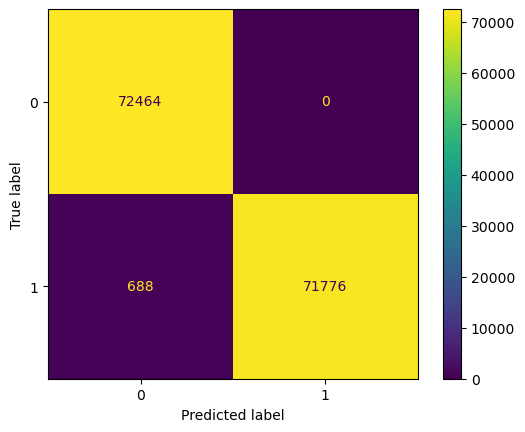

In [36]:
cm_train_optimized = confusion_matrix(y_train_SMOTE, y_train_pred_opt)
disp_train_optimized = ConfusionMatrixDisplay(cm_train, display_labels=best_model.classes_)
disp_train_optimized.plot()

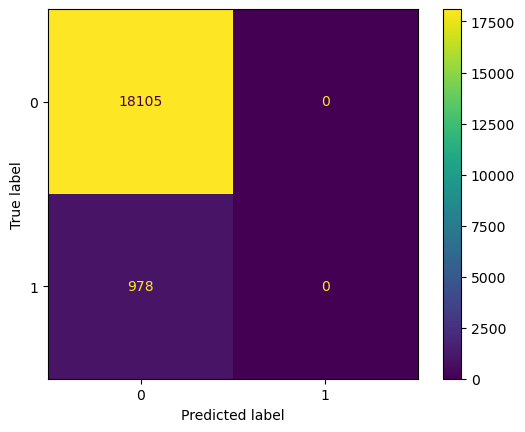

In [37]:
cm_test_optimized = confusion_matrix(y_test, y_test_pred_opt)
disp_test_optimized = ConfusionMatrixDisplay(cm_test_optimized, display_labels=best_model.classes_)
disp_test_optimized.plot()

But the model has not improved too much.